In [16]:
#train
import read_player_stats
import pandas as pd
import numpy as np
import training_data
from sklearn import linear_model
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.learning_curve import learning_curve
from sklearn import cross_validation
from sklearn import grid_search
from sklearn import metrics
pd.options.display.max_columns = 1000
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read in rb data for all seasons
total_df = training_data.make_total_data(seasons=range(2004,2015), pages=[0,1,2,3])
#training samples
train_df = training_data.make_training_df(total_df, seasons=range(2004,2014), ppg=True)

In [3]:
#training data
X_train = np.array(train_df.drop(['Name','FFPPG'], axis=1))
y_train = np.array(train_df['FFPPG'])

In [4]:
#linear regression
parameters = {'alpha': np.logspace(-10,10,num=20)}
lin_model = grid_search.GridSearchCV(linear_model.Ridge(), parameters, cv=10)
lin_model.fit(X_train, y_train)

scores =  cross_validation.cross_val_score(lin_model.best_estimator_, X_train, y_train, cv=10, scoring='mean_absolute_error')
scores

array([-2.18691751, -2.61220212, -2.57805724, -3.01639707, -2.56260303,
       -2.42278154, -2.40172124, -2.09589157, -2.24678613, -2.18009992])

In [13]:
#random forest
parameters = {'n_estimators': [10, 50, 100, 500, 1000]}
rf_model = grid_search.GridSearchCV(RandomForestRegressor(), parameters, cv=10)
rf_model.fit(X_train, y_train)

scores =  cross_validation.cross_val_score(rf_model.best_estimator_, X_train, y_train, cv=10, scoring='mean_absolute_error')
scores

array([-2.31973076, -2.47063847, -2.57260405, -3.03245183, -2.2925014 ,
       -2.6540903 , -2.36432903, -2.05957201, -2.41592481, -2.27941268])

In [28]:
#kNN
parameters = {'n_neighbors': range(2,50), 'weights': ['distance', 'uniform']}
knn_model = grid_search.GridSearchCV(KNeighborsRegressor(), parameters, cv=10)
knn_model.fit(X_train, y_train)

scores =  cross_validation.cross_val_score(knn_model.best_estimator_, X_train, y_train, cv=10, scoring='mean_absolute_error')
scores

array([-2.17400348, -2.50070864, -2.55751762, -2.91399522, -2.48254991,
       -2.36684434, -2.40138191, -1.98937459, -2.36306937, -2.40633196])

In [35]:
#learning curves
lin_size, lin_train_score, lin_cv_score = learning_curve(lin_model.best_estimator_, X_train, y_train, train_sizes=[5,10,50,100,500], cv=10, scoring='mean_absolute_error')
rf_size, rf_train_score, rf_cv_score = learning_curve(rf_model.best_estimator_, X_train, y_train, train_sizes=[5,10,50,100,500], cv=10, scoring='mean_absolute_error')
knn_size, knn_train_score, knn_cv_score = learning_curve(knn_model.best_estimator_, X_train, y_train, train_sizes=[50,100,500], cv=10, scoring='mean_absolute_error')

In [43]:
lin_avg_train = np.mean(lin_train_score, axis=1)
lin_avg_cv = np.mean(lin_cv_score, axis=1)
rf_avg_train = np.mean(rf_train_score, axis=1)
rf_avg_cv = np.mean(rf_cv_score, axis=1)
knn_avg_train = np.mean(knn_train_score, axis=1)
knn_avg_cv = np.mean(knn_cv_score, axis=1)

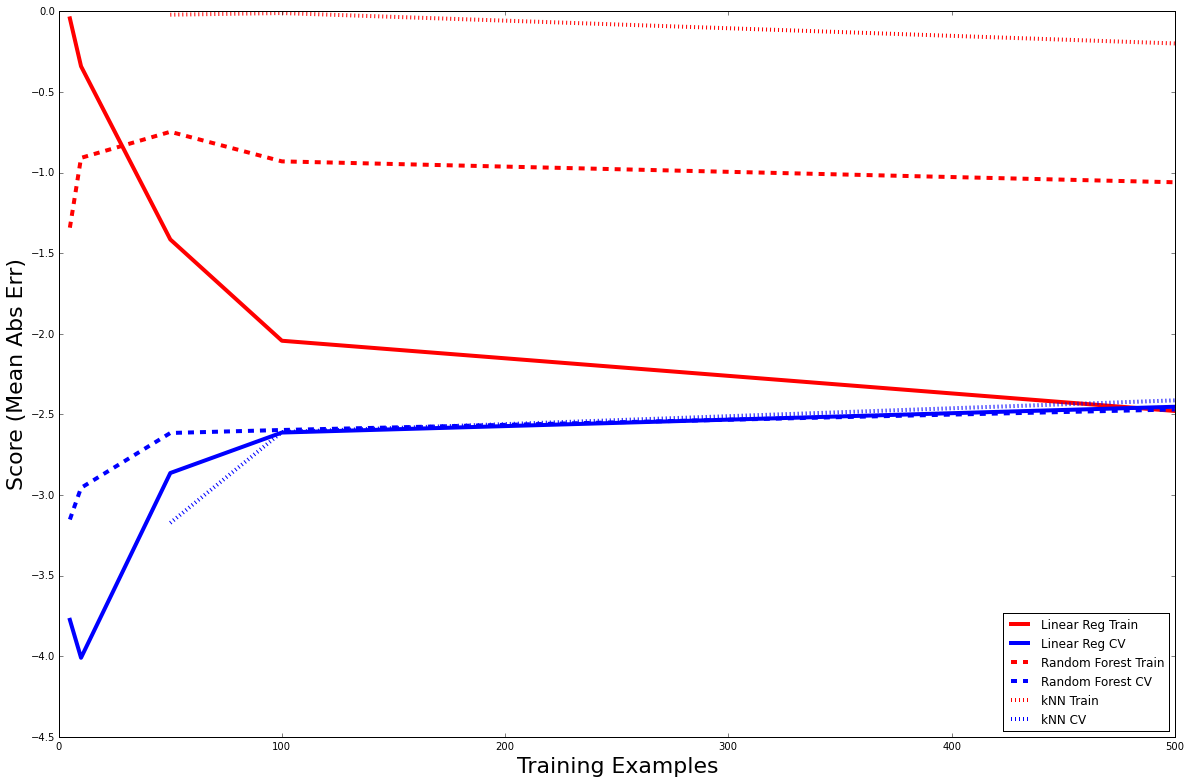

In [52]:
fig = plt.figure(figsize=(20, 13))
plt.xlabel('Training Examples', fontsize=22)
plt.ylabel('Score (Mean Abs Err)', fontsize=22)
plt.plot(lin_size, lin_avg_train, 'r-', label='Linear Reg Train', linewidth=4.0)
plt.plot(lin_size, lin_avg_cv, 'b-', label='Linear Reg CV', linewidth=4.0)
plt.plot(rf_size, rf_avg_train, 'r--', label='Random Forest Train', linewidth=4.0)
plt.plot(rf_size, rf_avg_cv, 'b--', label='Random Forest CV', linewidth=4.0)
plt.plot(knn_size, knn_avg_train, 'r:', label='kNN Train', linewidth=4.0)
plt.plot(knn_size, knn_avg_cv, 'b:', label='kNN CV', linewidth=4.0)

plt.legend(loc='best')